In [ ]:
# 1. Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Configuration de l'affichage
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# Lire le fichier .txt sans en-têtes et ajouter des noms de colonnes
df = pd.read_csv("ex2data1.txt", delimiter=",", header=None, names=["Exam1", "Exam2","Admission"])

# Aperçu des données
print("=== 5 premières lignes ===")
print(df.head())
print("\n=== Statistiques descriptives ===")
print(df.describe())
print("\n=== Répartition des admissions ===")
print(df["Admission"].value_counts())

# Exporter en CSV (avec les nouveaux noms de colonnes)
df.to_csv("ex2data1.csv", index=False)

=== 5 premières lignes ===
   Exam1  Exam2  Admission
0  34.62  78.02          0
1  30.29  43.89          0
2  35.85  72.90          0
3  60.18  86.31          1
4  79.03  75.34          1

=== Statistiques descriptives ===
       Exam1  Exam2  Admission
count 100.00 100.00     100.00
mean   65.64  66.22       0.60
std    19.46  18.58       0.49
min    30.06  30.60       0.00
25%    50.92  48.18       0.00
50%    67.03  67.68       1.00
75%    80.21  79.36       1.00
max    99.83  98.87       1.00

=== Répartition des admissions ===
Admission
1    60
0    40
Name: count, dtype: int64


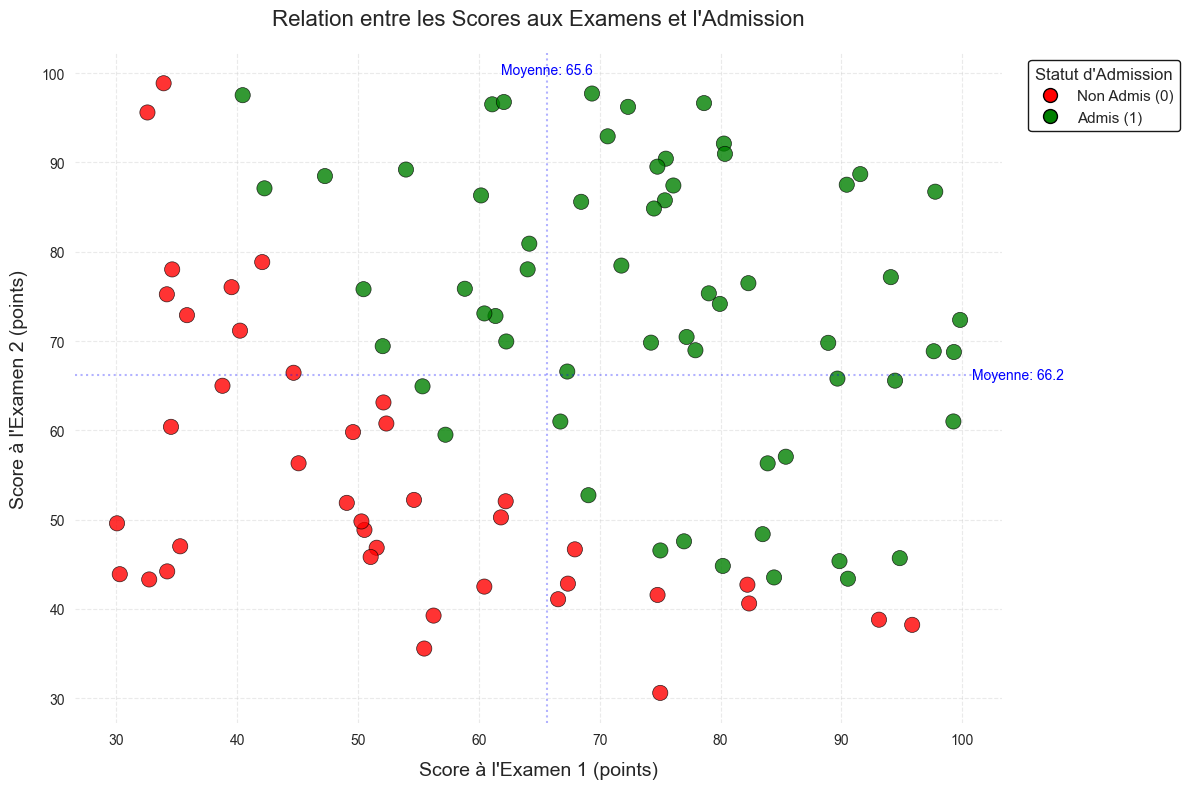

In [ ]:
# Visualisation des Données
plt.figure(figsize=(12, 8))

# Scatter plot 
scatter = sns.scatterplot(
    data=df,
    x="Exam1",
    y="Exam2",
    hue="Admission",
    palette={0: "red", 1: "green"},
    marker='o',              
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5,
    legend=False              # 
)

# Titre et axes
plt.title("Relation entre les Scores aux Examens et l'Admission", fontsize=16, pad=20)
plt.xlabel("Score à l'Examen 1 (points)", fontsize=14, labelpad=10)
plt.ylabel("Score à l'Examen 2 (points)", fontsize=14, labelpad=10)

# Légende manuelle
legend_elements = [
    Line2D([0], [0], marker='o', color='red', label='Non Admis (0)', 
           markersize=10, linestyle='None', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='green', label='Admis (1)',
           markersize=10, linestyle='None', markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title="Statut d'Admission",
    title_fontsize=12,
    fontsize=11,
    frameon=True,
    framealpha=0.9,
    edgecolor='black',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

# Améliorations visuelles
plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Références statistiques
exam1_mean = df['Exam1'].mean()
exam2_mean = df['Exam2'].mean()
plt.axhline(y=exam2_mean, color='blue', linestyle=':', alpha=0.3)
plt.axvline(x=exam1_mean, color='blue', linestyle=':', alpha=0.3)

# Annotations des moyennes
plt.text(df['Exam1'].max() + 1, exam2_mean, f"Moyenne: {exam2_mean:.1f}",
         color='blue', va='center')
plt.text(exam1_mean, df['Exam2'].max() + 1, f"Moyenne: {exam1_mean:.1f}",
         color='blue', ha='center')

plt.tight_layout()
plt.show()

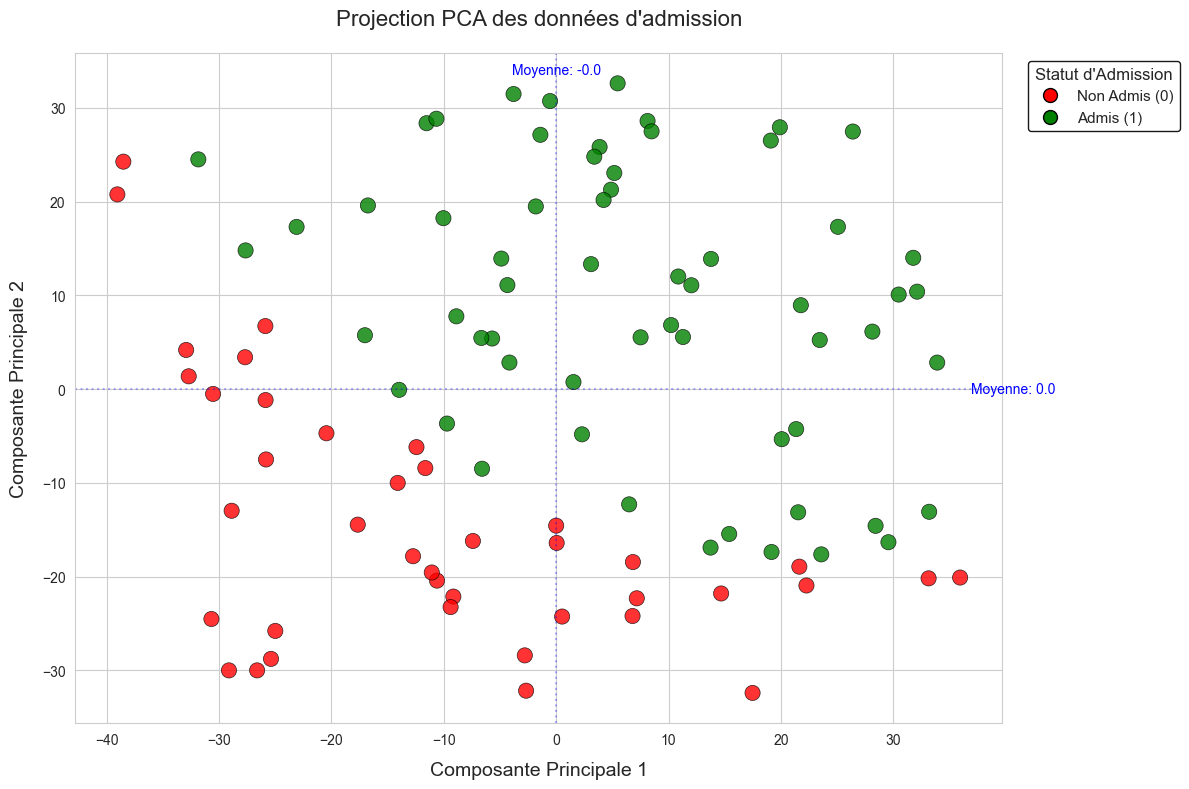

In [ ]:
#PCA

features = df.drop(columns=["Admission"])  
pca = PCA(n_components=2)  
components = pca.fit_transform(features)

# Création d’un DataFrame avec les composantes principales
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_pca['Admission'] = df['Admission']  

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="Admission",
    palette={0: "red", 1: "green"},
    marker='o',
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5,
    legend=False
)

# Titre et axes
plt.title("Projection PCA des données d'admission", fontsize=16, pad=20)
plt.xlabel("Composante Principale 1", fontsize=14, labelpad=10)
plt.ylabel("Composante Principale 2", fontsize=14, labelpad=10)

# Légende manuelle
legend_elements = [
    Line2D([0], [0], marker='o', color='red', label='Non Admis (0)',
           markersize=10, linestyle='None', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='green', label='Admis (1)',
           markersize=10, linestyle='None', markeredgecolor='black')
]
plt.legend(
    handles=legend_elements,
    title="Statut d'Admission",
    title_fontsize=12,
    fontsize=11,
    frameon=True,
    framealpha=0.9,
    edgecolor='black',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

# Ajout des lignes de moyenne
pc1_mean = df_pca['PC1'].mean()
pc2_mean = df_pca['PC2'].mean()
plt.axhline(y=pc2_mean, color='blue', linestyle=':', alpha=0.3)
plt.axvline(x=pc1_mean, color='blue', linestyle=':', alpha=0.3)

# Annotations des moyennes
plt.text(df_pca['PC1'].max() + 1, pc2_mean, f"Moyenne: {pc2_mean:.1f}",
         color='blue', va='center')
plt.text(pc1_mean, df_pca['PC2'].max() + 1, f"Moyenne: {pc1_mean:.1f}",
         color='blue', ha='center')

plt.tight_layout()
plt.show()


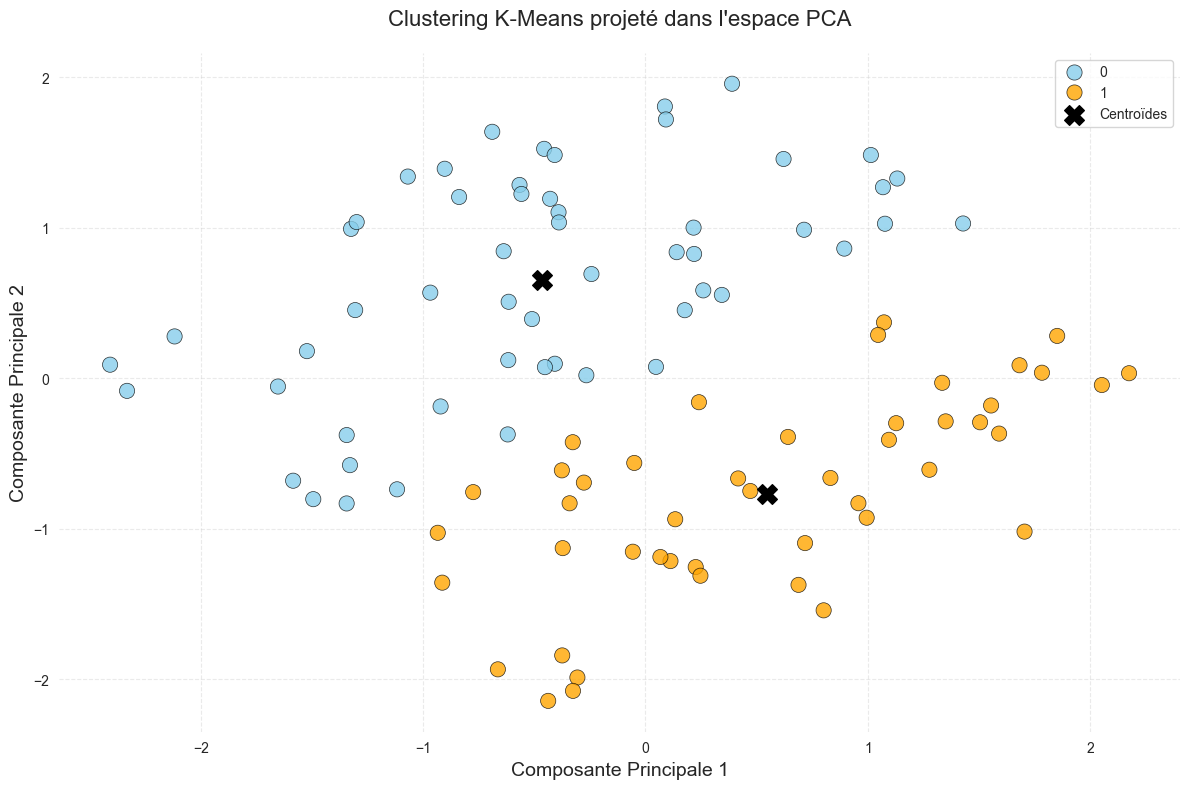

In [36]:
# --- Étape 1 : Standardisation ---
X = df.drop(columns=['Admission'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Étape 2 : PCA (réduction à 2D pour visualisation) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Étape 3 : K-Means Clustering ---
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# --- Étape 4 : Création d’un DataFrame pour visualisation ---
df_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters
df_clusters['Admission'] = df['Admission']  # pour comparaison éventuelle

# --- Étape 5 : Visualisation des Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clusters,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette={0: "skyblue", 1: "orange"},
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

plt.title("Clustering K-Means projeté dans l'espace PCA", fontsize=16, pad=20)
plt.xlabel("Composante Principale 1", fontsize=14)
plt.ylabel("Composante Principale 2", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Centroides dans le plan PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, c='black', label='Centroïdes')
plt.legend()

plt.tight_layout()
plt.show()


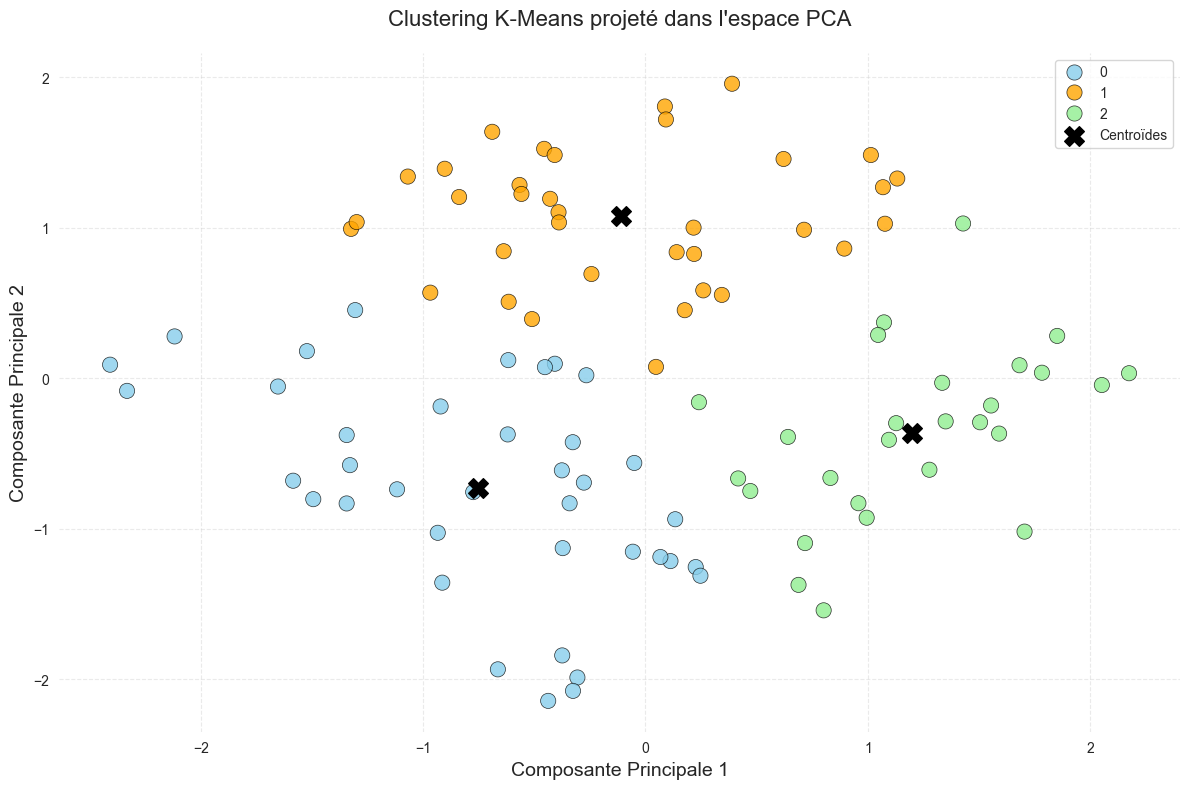

In [40]:
# --- Étape 1 : Standardisation ---
X = df.drop(columns=['Admission'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Étape 2 : PCA (réduction à 2D pour visualisation) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Étape 3 : K-Means Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# --- Étape 4 : Création d’un DataFrame pour visualisation ---
df_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters
df_clusters['Admission'] = df['Admission']  # pour comparaison éventuelle

# --- Étape 5 : Visualisation des Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clusters,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette={0: "skyblue", 1: "orange", 2: "lightgreen"},
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

plt.title("Clustering K-Means projeté dans l'espace PCA", fontsize=16, pad=20)
plt.xlabel("Composante Principale 1", fontsize=14)
plt.ylabel("Composante Principale 2", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Centroides dans le plan PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, c='black', label='Centroïdes')
plt.legend()

plt.tight_layout()
plt.show()

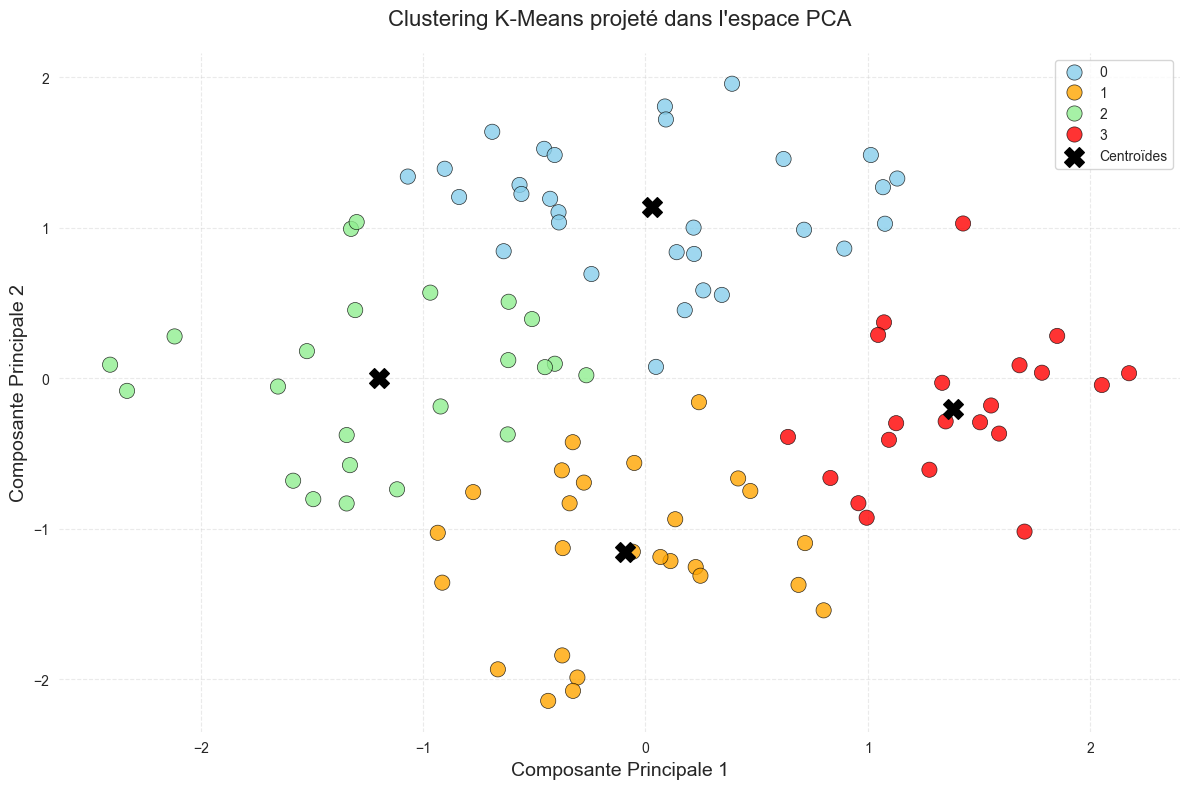

In [41]:
# --- Étape 1 : Standardisation ---
X = df.drop(columns=['Admission'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Étape 2 : PCA (réduction à 2D pour visualisation) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Étape 3 : K-Means Clustering ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# --- Étape 4 : Création d’un DataFrame pour visualisation ---
df_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters
df_clusters['Admission'] = df['Admission']  # pour comparaison éventuelle

# --- Étape 5 : Visualisation des Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clusters,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette={0: "skyblue", 1: "orange", 2: "lightgreen", 3: "red"},
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

plt.title("Clustering K-Means projeté dans l'espace PCA", fontsize=16, pad=20)
plt.xlabel("Composante Principale 1", fontsize=14)
plt.ylabel("Composante Principale 2", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Centroides dans le plan PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, c='black', label='Centroïdes')
plt.legend()

plt.tight_layout()
plt.show()

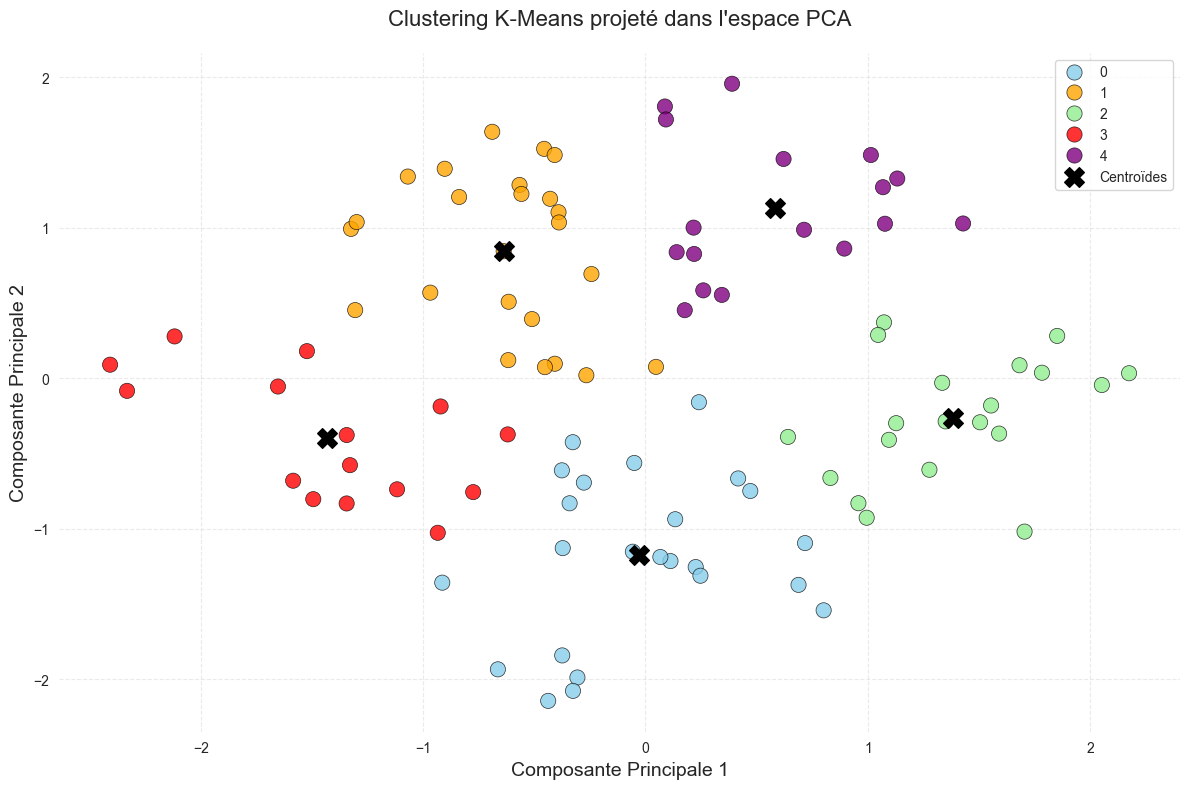

In [42]:
# --- Étape 1 : Standardisation ---
X = df.drop(columns=['Admission'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Étape 2 : PCA (réduction à 2D pour visualisation) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Étape 3 : K-Means Clustering ---
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# --- Étape 4 : Création d’un DataFrame pour visualisation ---
df_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters
df_clusters['Admission'] = df['Admission']  # pour comparaison éventuelle

# --- Étape 5 : Visualisation des Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clusters,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette={0: "skyblue", 1: "orange", 2: "lightgreen", 3: "red", 4: "purple"},
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

plt.title("Clustering K-Means projeté dans l'espace PCA", fontsize=16, pad=20)
plt.xlabel("Composante Principale 1", fontsize=14)
plt.ylabel("Composante Principale 2", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Centroides dans le plan PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, c='black', label='Centroïdes')
plt.legend()

plt.tight_layout()
plt.show()

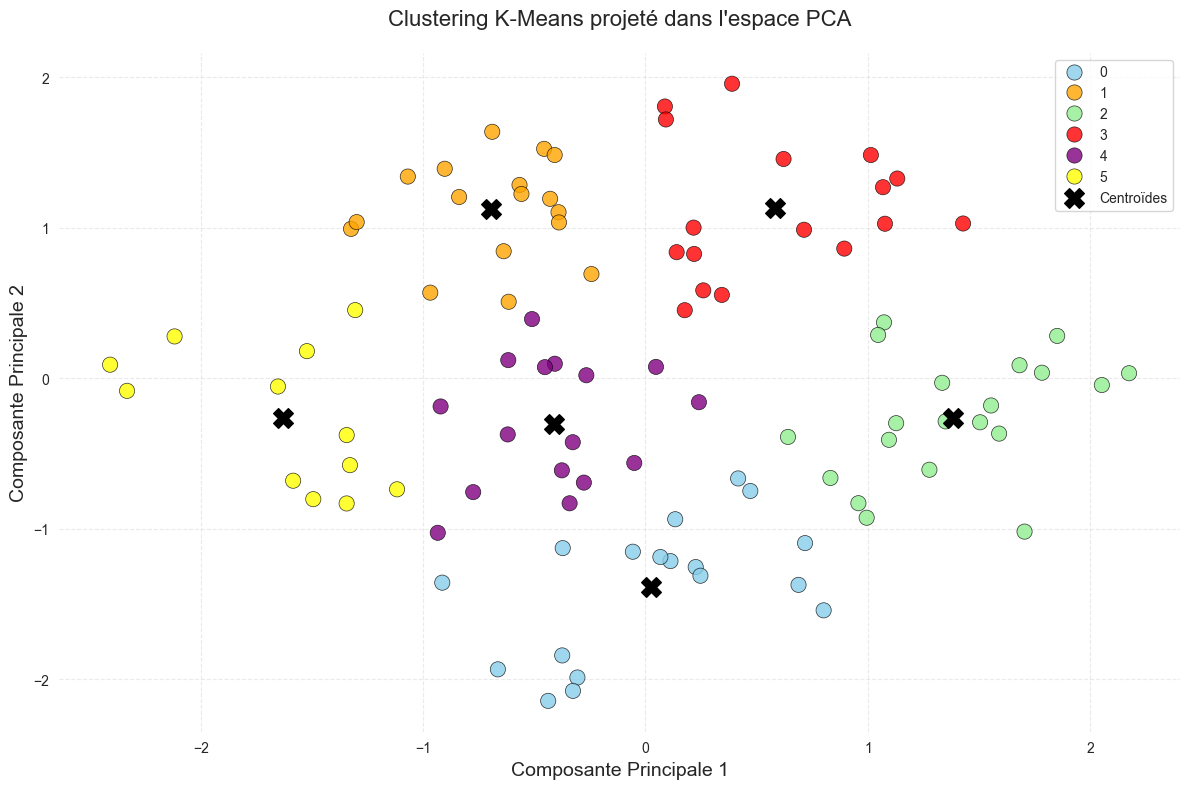

In [43]:
# --- Étape 1 : Standardisation ---
X = df.drop(columns=['Admission'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Étape 2 : PCA (réduction à 2D pour visualisation) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Étape 3 : K-Means Clustering ---
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# --- Étape 4 : Création d’un DataFrame pour visualisation ---
df_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters
df_clusters['Admission'] = df['Admission']  # pour comparaison éventuelle

# --- Étape 5 : Visualisation des Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clusters,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette={0: "skyblue", 1: "orange", 2: "lightgreen", 3: "red", 4: "purple", 5: "yellow"},
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

plt.title("Clustering K-Means projeté dans l'espace PCA", fontsize=16, pad=20)
plt.xlabel("Composante Principale 1", fontsize=14)
plt.ylabel("Composante Principale 2", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Centroides dans le plan PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, c='black', label='Centroïdes')
plt.legend()

plt.tight_layout()
plt.show()

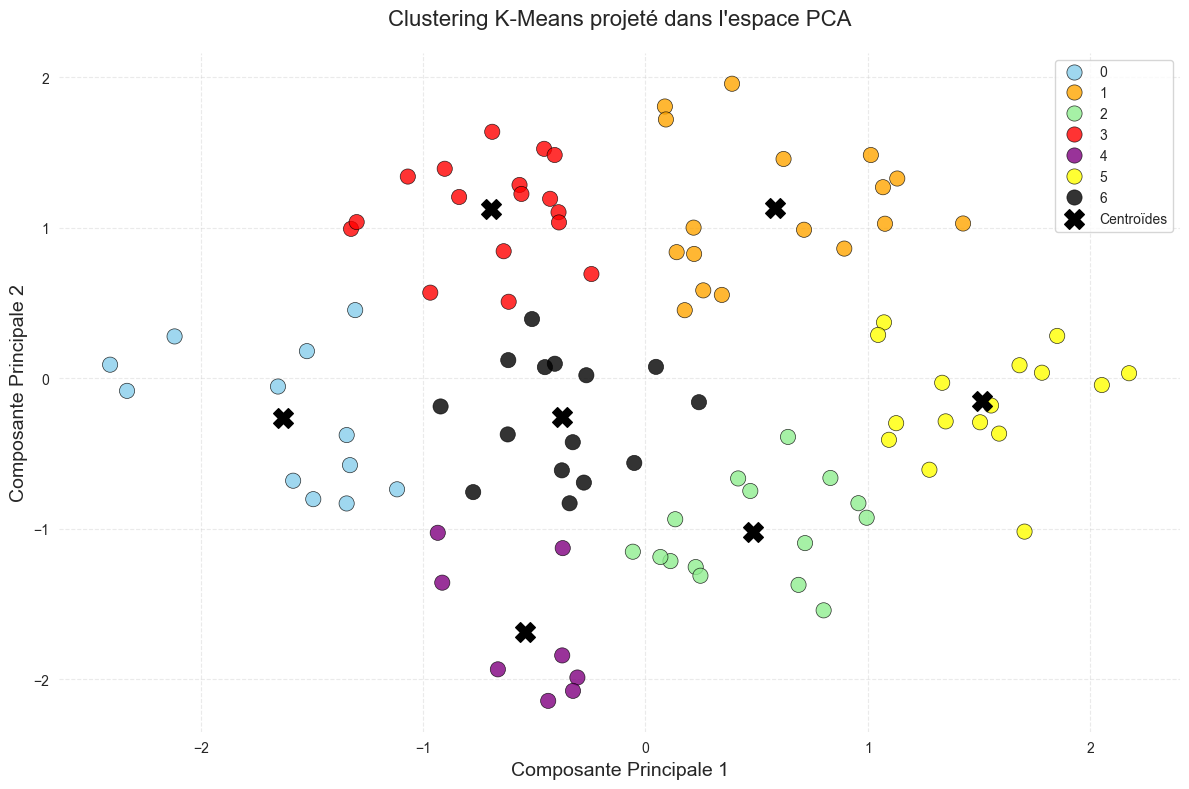

In [44]:
# --- Étape 1 : Standardisation ---
X = df.drop(columns=['Admission'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Étape 2 : PCA (réduction à 2D pour visualisation) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Étape 3 : K-Means Clustering ---
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# --- Étape 4 : Création d’un DataFrame pour visualisation ---
df_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters
df_clusters['Admission'] = df['Admission']  # pour comparaison éventuelle

# --- Étape 5 : Visualisation des Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clusters,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette={0: "skyblue", 1: "orange", 2: "lightgreen", 3: "red", 4: "purple", 5: "yellow", 6: "black"},
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

plt.title("Clustering K-Means projeté dans l'espace PCA", fontsize=16, pad=20)
plt.xlabel("Composante Principale 1", fontsize=14)
plt.ylabel("Composante Principale 2", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Centroides dans le plan PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, c='black', label='Centroïdes')
plt.legend()

plt.tight_layout()
plt.show()

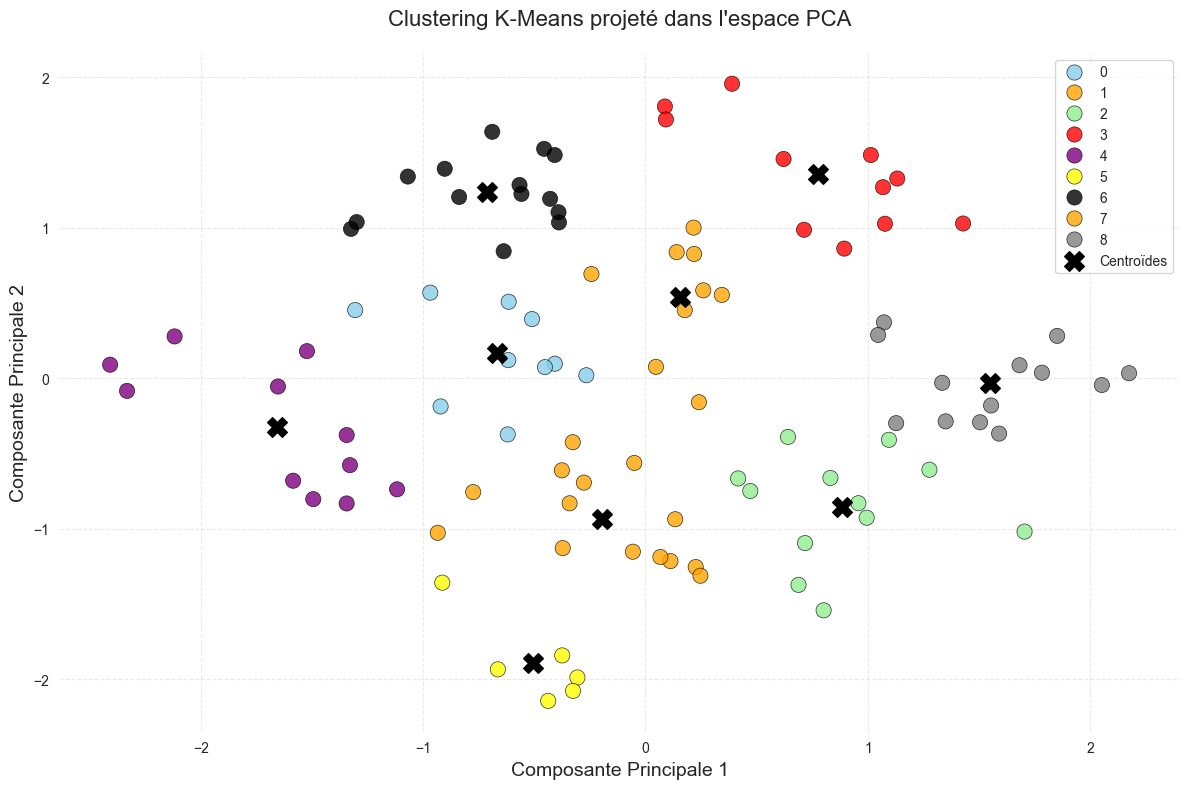

In [46]:
# --- Étape 1 : Standardisation ---
X = df.drop(columns=['Admission'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Étape 2 : PCA (réduction à 2D pour visualisation) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Étape 3 : K-Means Clustering ---
kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# --- Étape 4 : Création d’un DataFrame pour visualisation ---
df_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters
df_clusters['Admission'] = df['Admission']  # pour comparaison éventuelle

# --- Étape 5 : Visualisation des Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clusters,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette={0: "skyblue", 1: "orange", 2: "lightgreen", 3: "red", 4: "purple", 5: "yellow", 6: "black", 7: "orange", 8: "grey"},
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

plt.title("Clustering K-Means projeté dans l'espace PCA", fontsize=16, pad=20)
plt.xlabel("Composante Principale 1", fontsize=14)
plt.ylabel("Composante Principale 2", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Centroides dans le plan PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, c='black', label='Centroïdes')
plt.legend()

plt.tight_layout()
plt.show()

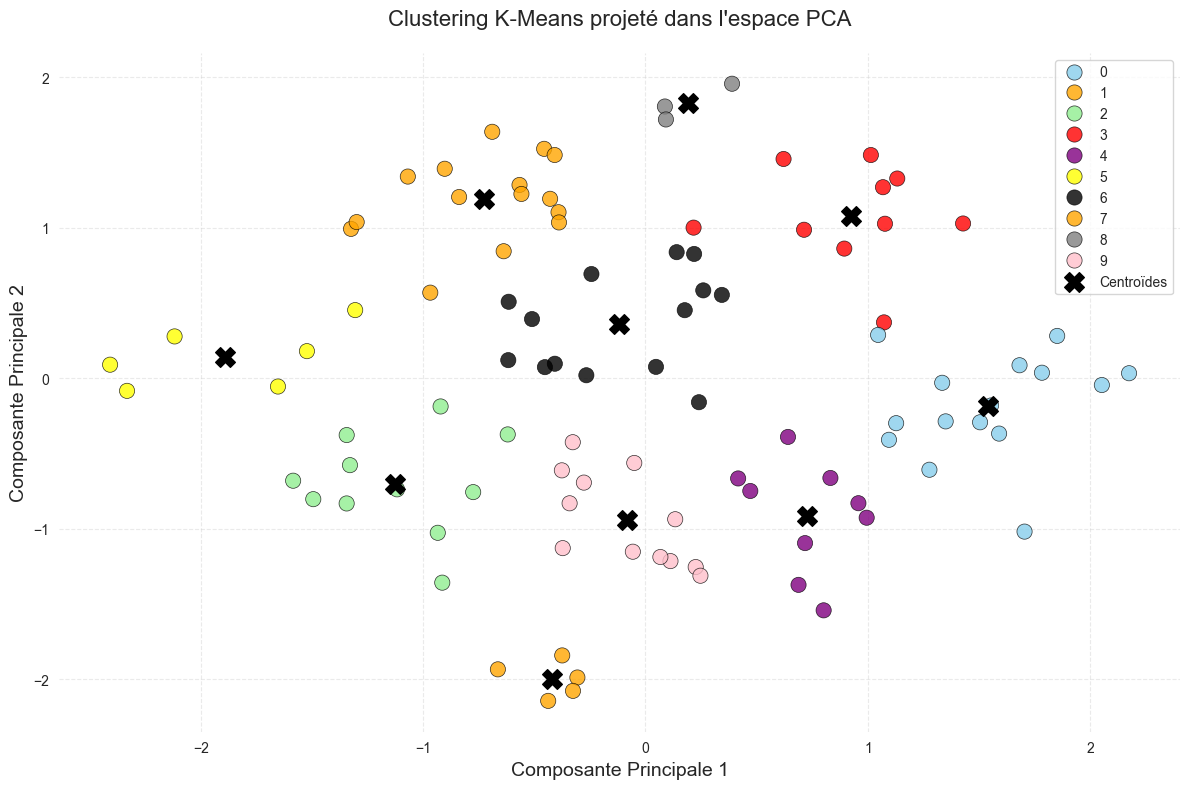

In [45]:
# --- Étape 1 : Standardisation ---
X = df.drop(columns=['Admission'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Étape 2 : PCA (réduction à 2D pour visualisation) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Étape 3 : K-Means Clustering ---
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# --- Étape 4 : Création d’un DataFrame pour visualisation ---
df_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters
df_clusters['Admission'] = df['Admission']  # pour comparaison éventuelle

# --- Étape 5 : Visualisation des Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clusters,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette={0: "skyblue", 1: "orange", 2: "lightgreen", 3: "red", 4: "purple", 5: "yellow", 6: "black", 7: "orange", 8: "grey", 9: "pink"},
    s=120,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

plt.title("Clustering K-Means projeté dans l'espace PCA", fontsize=16, pad=20)
plt.xlabel("Composante Principale 1", fontsize=14)
plt.ylabel("Composante Principale 2", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Centroides dans le plan PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, c='black', label='Centroïdes')
plt.legend()

plt.tight_layout()
plt.show()

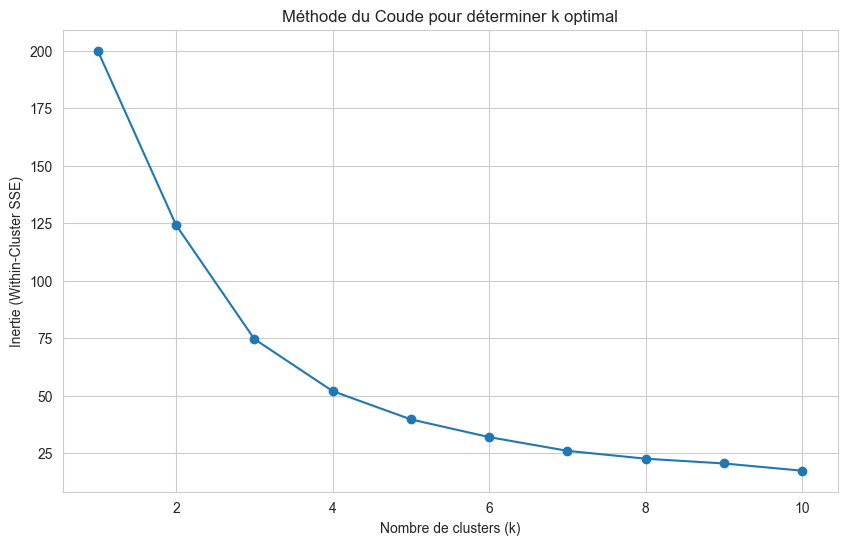

In [62]:
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title("Méthode du Coude pour déterminer k optimal")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (Within-Cluster SSE)")
plt.grid(True)
plt.show()

L'inertie diminue fortement entre k = 1 et k = 3.

Ensuite, la diminution devient plus progressive à partir de k = 4 ou 5.

À partir de k = 6, le gain est marginal : la courbe commence à s'aplatir.

Quel est le coude ?

Visuellement, le "coude" le plus marqué semble se situer autour de k = 3 ou k = 4.
C’est là que la pente change de manière significative.

Conclusion : Le nombre optimal de clusters à choisir serait probablement k = 3 ou k = 4.

Tu pourrais tester les deux (k=3 et k=4) en traçant les clusters dans un nuage de points pour comparer leur signification visuelle.

In [56]:
# 1. Sélection des features et target
X = df[["Exam1", "Exam2"]]
y = df["Admission"]

# 2. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# 4. Création et entraînement du modèle
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 5. Prédiction sur le test
y_pred = logreg.predict(X_test)

# 6. Affichage des performances
print("=== Performance Régression Logistique ===")
print(classification_report(y_test, y_pred))
print("\nMatrice de Confusion:")
print(confusion_matrix(y_test, y_pred))

=== Performance Régression Logistique ===
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20


Matrice de Confusion:
[[7 1]
 [3 9]]


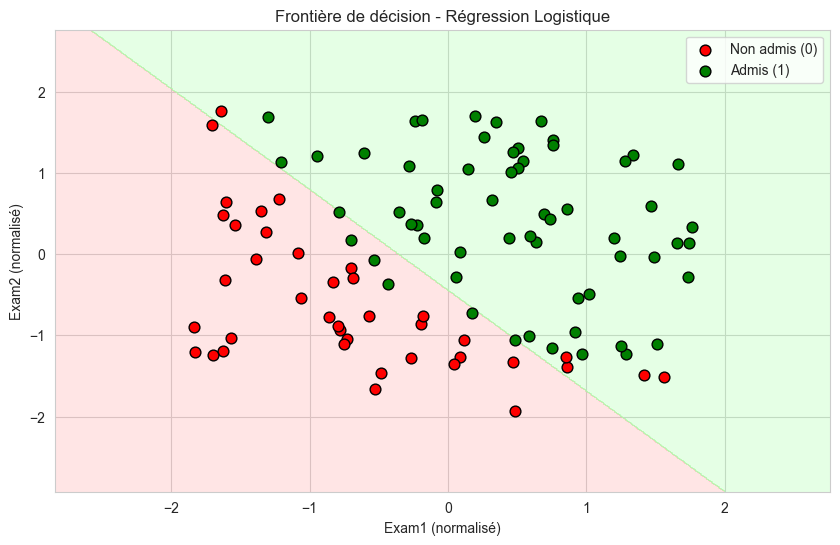

In [61]:
# 2. Création de la grille pour visualiser la frontière
h = 0.01  # résolution de la grille
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 3. Prédiction sur la grille
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Tracé
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])  # couleurs zones
cmap_bold = ListedColormap(['#FF0000', '#00AA00'])   # couleurs points

# Affichage des zones prédites
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Affichage des points (non-admis = 0, admis = 1)
plt.scatter(X_scaled[y==0, 0], X_scaled[y==0, 1], c='red', label='Non admis (0)', edgecolor='k', s=60)
plt.scatter(X_scaled[y==1, 0], X_scaled[y==1, 1], c='green', label='Admis (1)', edgecolor='k', s=60)

plt.xlabel('Exam1 (normalisé)')
plt.ylabel('Exam2 (normalisé)')
plt.title("Frontière de décision - Régression Logistique")
plt.legend()
plt.show()


Qu’est-ce que l’accuracy ?

L’accuracy est le pourcentage de prédictions correctes effectuées par le modèle par rapport au nombre total d’observations. En d’autres termes, cela mesure la proportion d’étudiants correctement classés comme admis ou non admis.

Est-ce un bon score ?

Oui, 89% peut sembler élevé, surtout si le jeu de données est équilibré (autant d’admis que de non-admis). Cela indique que le modèle généralise bien… mais ce n’est pas suffisant à lui seul.

Limites de l’accuracy seule :

    Elle ne dit rien sur les erreurs spécifiques : le modèle se trompe-t-il plus souvent sur les admis ou sur les non-admis ?

    Elle peut masquer un biais, surtout en cas de classes déséquilibrées 

    Elle ne montre pas où le modèle se trompe : exemple les outliers

Conclusion : L’accuracy est une bonne première mesure, mais doit être complétée par d'autres indicateurs (précision, rappel, matrice de confusion, etc.).

6. Interprétation Approfondie et Évaluation Critique du Modèle

Ces cas montrent que le modèle :

    Simplifie la réalité : il ne tient compte que de deux notes.

    Peut être biaisé si une note est mal pondérée

Données supplémentaires utiles :

    Note d’un troisième examen, participation, moyenne générale.


Conclusion globale : Le modèle est-il fiable ?

    Oui, le modèle semble fiable dans un cadre simple et bien défini, surtout si l’accuracy est élevée 

    Mais, il faut rester prudent :

    Ce modèle reste limitée avec seulement deux variables.

        Il ne gèere pas les cas estrêmes

        Il pourrait discriminer involontairement si les variables sont mal choisies ou incomplètes.

🎓 Recommandation :

    - Utile comme outil d’aide à la décision, mais ne doit pas être le seul critère d’admission.
    - Faire une étude plus poussée avec plus de variables et/ou creuser les hyperparamter
